In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
label_data = pd.read_csv('C:/Users/yoonb/성균관대학교/4학년/2학기/스마트팩토리캡스톤디자인2/04. Dataset_Molding/dataset/labeled_data.csv')

In [3]:
label_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    7992
1800TON-우진       2
650톤-우진          2
Name: EQUIP_NAME, dtype: int64

In [4]:
label_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
JX1 W/S SIDE MLD'G RH           2
SP2 CVR ROOF RACK CTR, RH       2
Name: PART_NAME, dtype: int64

In [5]:
def make_input(data, machine_name, product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    #불필요하다고 판단된 columns
    #pandas package의 라이브러리인 'drop'을 통해 지정한 열 제거
    
    data.drop(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'Reason', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME',
              'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 'Mold_Temperature_6',
              'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10',
               'Mold_Temperature_11', 'Mold_Temperature_12', 'Switch_Over_Position', 'Barrel_Temperature_7'], axis=1, inplace=True)
    return data

In [6]:
machine_name = "650톤-우진2호기"

product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

cn7lh = make_input(label_data, machine_name, product_name[0])

cn7rh = make_input(label_data, machine_name, product_name[1])

rg3lh = make_input(label_data, machine_name, product_name[2])

rg3rh = make_input(label_data, machine_name, product_name[3])

cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

rg3.drop(['Plasticizing_Position'], axis=1, inplace=True)

C:\Users\yoonb\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

In [8]:
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,...,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,...,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,...,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,...,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,...,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,...,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,...,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,...,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


<AxesSubplot:>

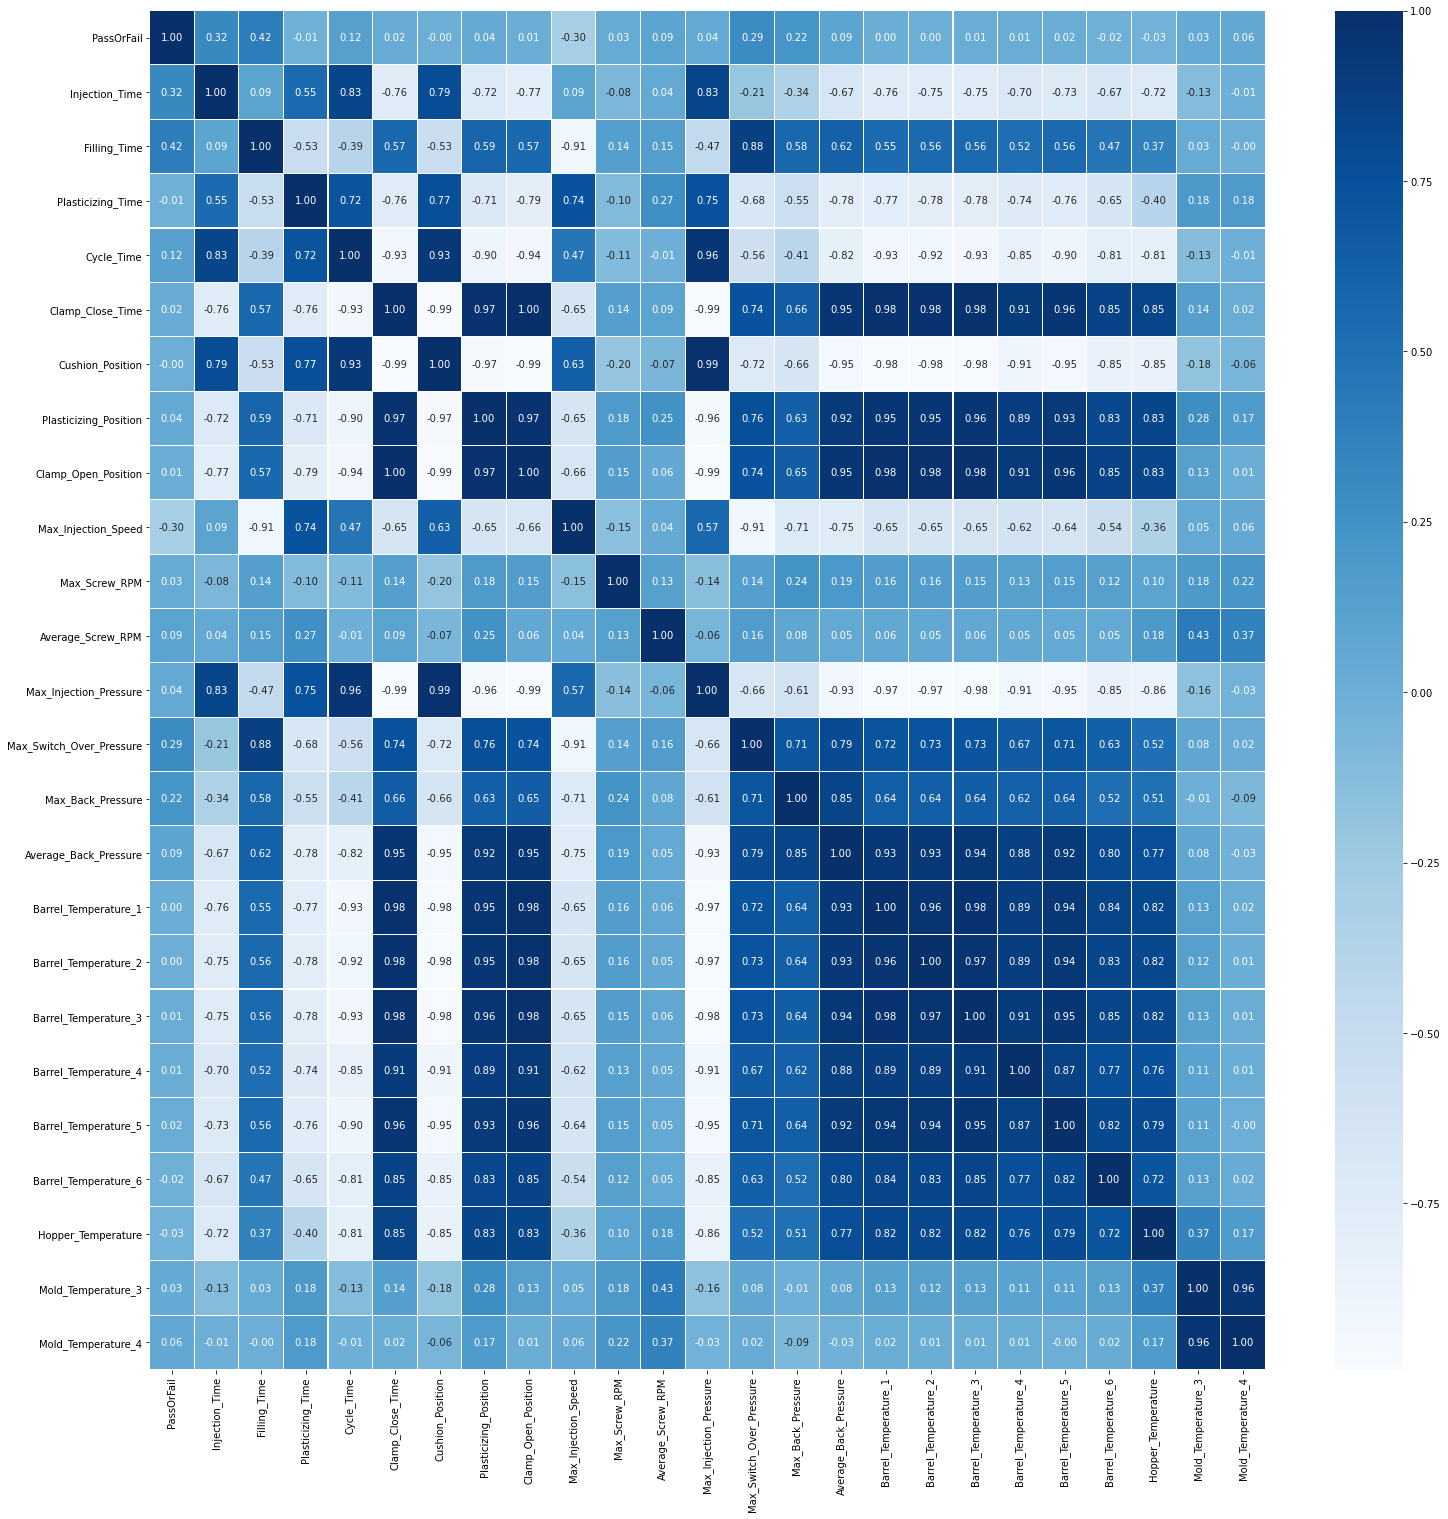

In [9]:
plt.subplots(figsize=(25,25))
sns.heatmap(data=cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

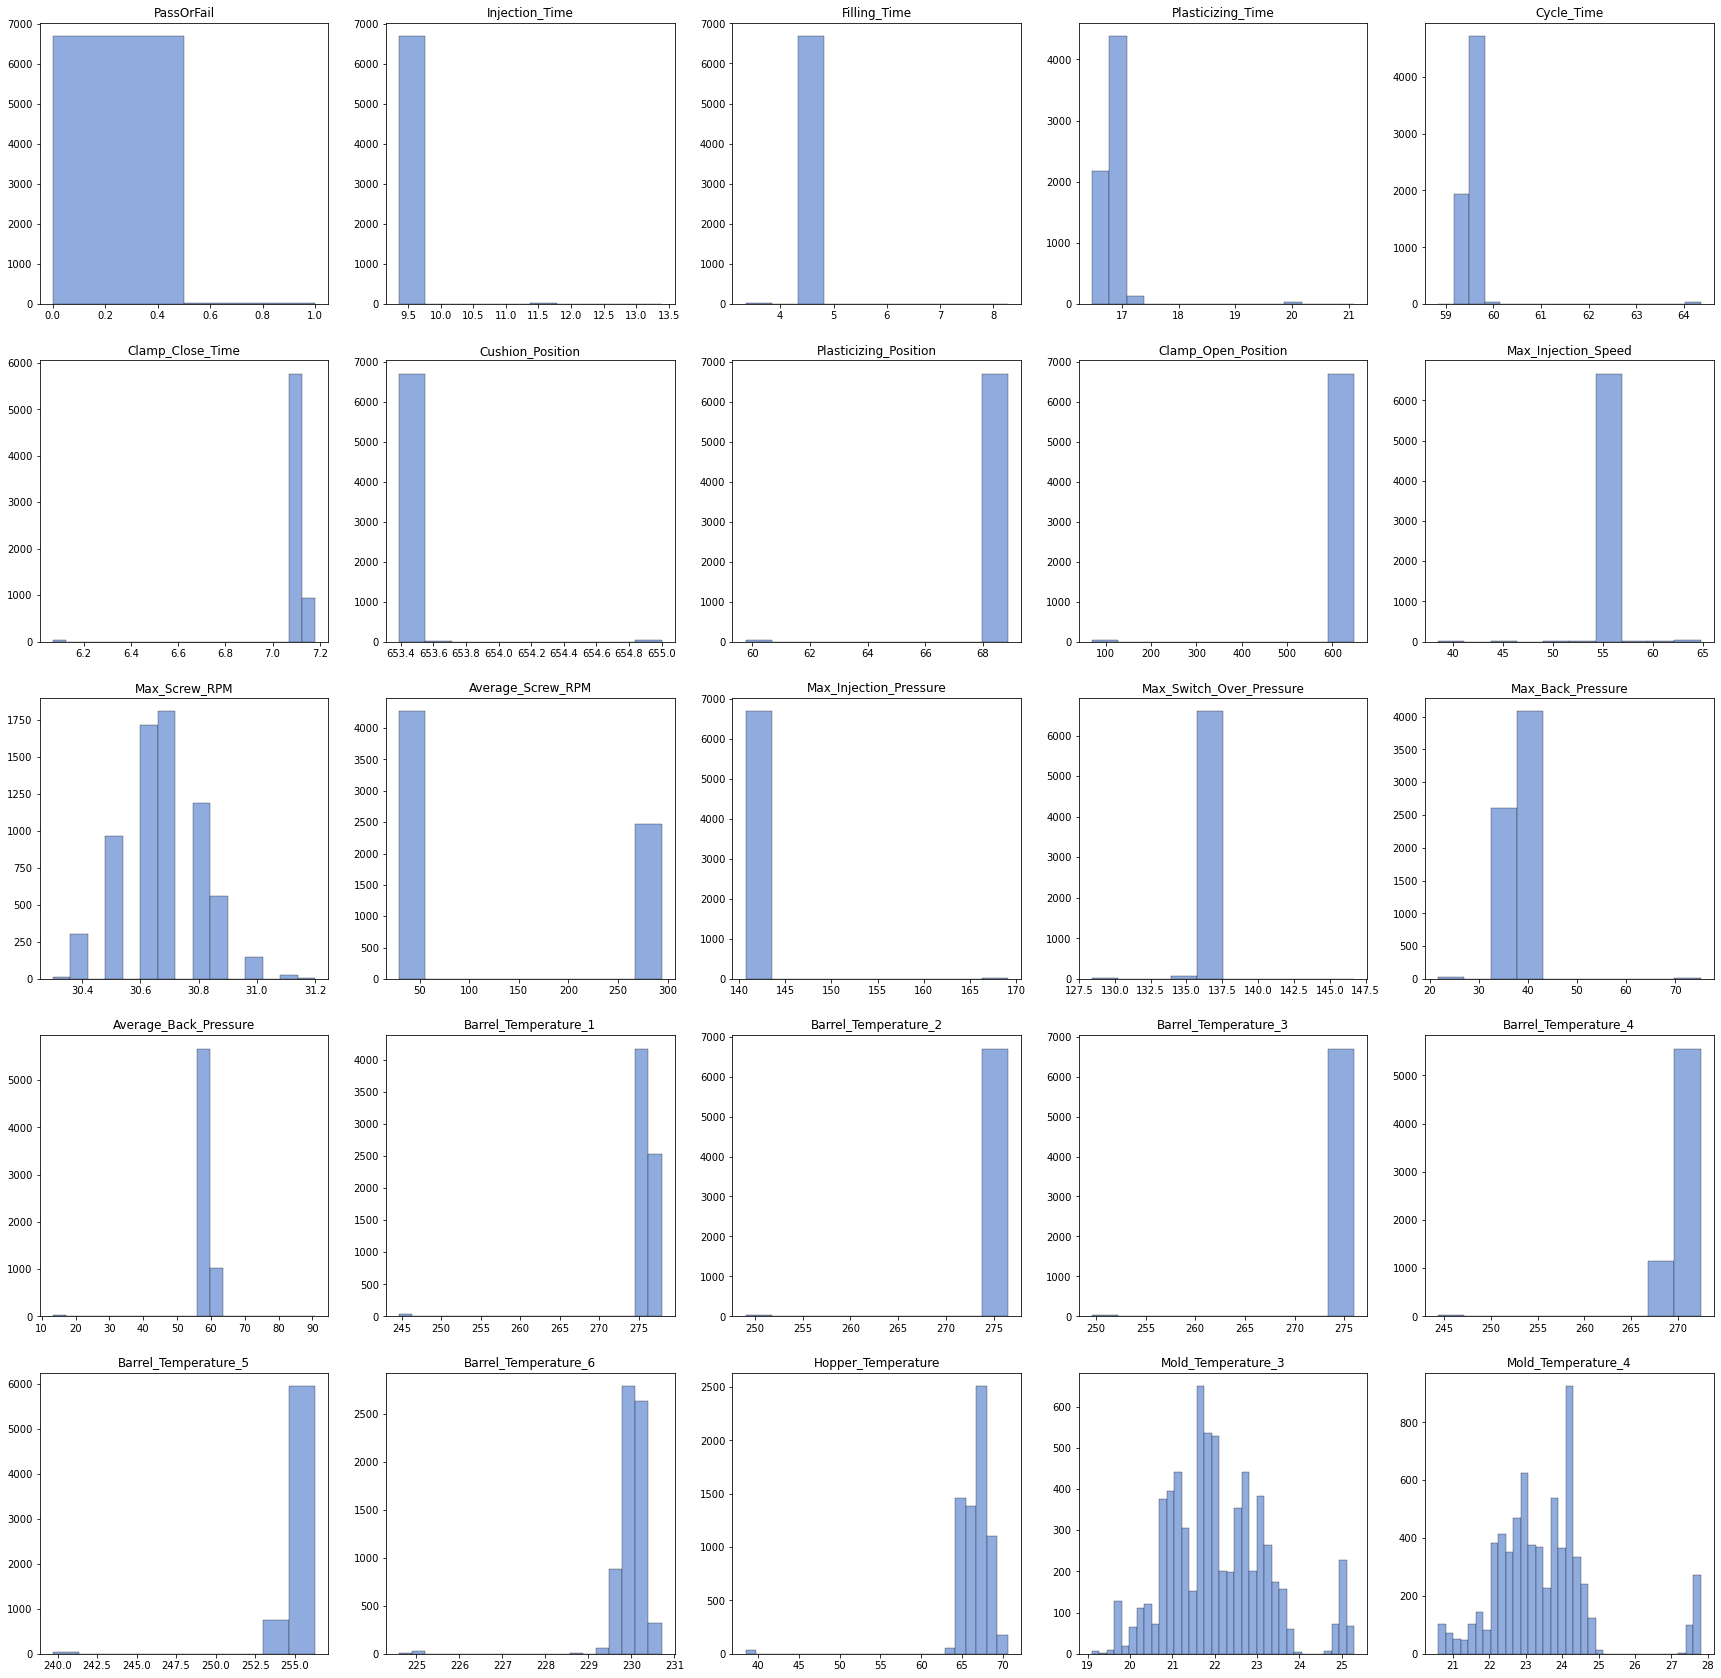

In [10]:
plt.figure(figsize=(30,30))

#각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35]

for index, value in enumerate(cn7):
    sub = plt.subplot(5, 5, index+1)
    sub.hist(cn7[value], bins = bin[index], facecolor = (144/255, 171/255, 221/255), linewidth=.3, edgecolor = 'black')
    plt.title(value)

In [11]:
cn7['PassOrFail'].value_counts()

0    6697
1      39
Name: PassOrFail, dtype: int64

In [12]:
cn7_Y = cn7[cn7['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_Y))

cn7_N = cn7[cn7['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_N))

CN7의 양품 개수: 6697
CN7의 불량 개수: 39


In [13]:
#오토인코더 모델에 학습시킬 데이터 (클래스변수 제거)
cn7_Y.drop(['PassOrFail'], axis=1, inplace=True)
cn7_N.drop(['PassOrFail'], axis=1, inplace=True)

C:\Users\yoonb\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
#데이터 정규화
scaler = MinMaxScaler()
#양품
cn7_Y = scaler.fit_transform(cn7_Y)
#불량
cn7_N = scaler.fit_transform(cn7_N)

In [15]:
#train, test split
# training data
cn7_train_Y = cn7_Y[:4000]

#test data
cn7_test_Y = cn7_Y[4000:]
cn7_test_N = cn7_N

print('CN7의 양품 학습 데이터셋 개수:', len(cn7_train_Y))
print('CN7의 양품 평가 데이터셋 개수:', len(cn7_test_Y))
print('CN7의 불량 평가 데이터셋 개수:', len(cn7_test_N))


CN7의 양품 학습 데이터셋 개수: 4000
CN7의 양품 평가 데이터셋 개수: 2697
CN7의 불량 평가 데이터셋 개수: 39


In [16]:
#오토인코더 모델 구축

#인코더
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation='relu'),
    Dense(5, activation='relu')
])

#디코더
dropout_decoder = Sequential([
    Dense(15, activation='relu', input_shape=[5]),
    Dense(cn7_train_Y.shape[1], activation='relu'),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

In [17]:
#손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])

#모델 훈련
history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=7, mode='min')])

C:\Users\yoonb\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
107/107 [==============================] - 2s 7ms/step - loss: 0.1320 - accuracy: 0.4022 - val_loss: 0.1109 - val_accuracy: 0.9688
Epoch 2/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.6894 - val_loss: 0.0888 - val_accuracy: 0.1963
Epoch 3/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.8231 - val_loss: 0.0859 - val_accuracy: 0.9688
Epoch 4/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.8244 - val_loss: 0.0827 - val_accuracy: 0.2362
Epoch 5/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.7322 - val_loss: 0.0843 - val_accuracy: 0.8087
Epoch 6/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.7962 - val_loss: 0.0825 - val_accuracy: 0.9688
Epoch 7/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.8384 - val_loss: 0.0825 - val_accuracy: 0.7825
Epoch 

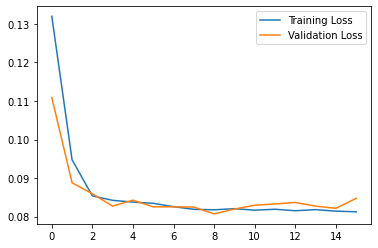

In [18]:
#과적합 여부 확인
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

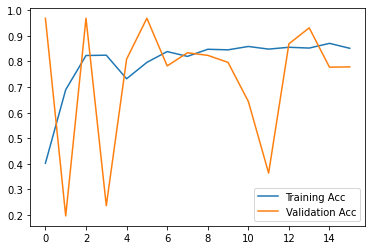

In [19]:
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.legend()
plt.show()

In [20]:
#임계값 설정하고 예측값과 복원 오차 확인

#예측값
cn7_train_pred = dropout_AE.predict(cn7_train_Y)

#복원 오차(예측값 - 실제값)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)

#임계치
threshold = np.mean(cn7_train_loss) + 5*np.std(cn7_train_loss)

print("복원 오류 임계치: ", threshold)

복원 오류 임계치:  0.1175181575438781


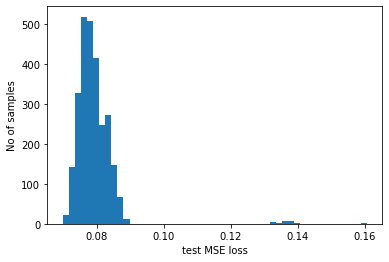

불량 개수:  22


In [21]:
#양품 데이터 중 불량 판단

#평가 데이터
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)

cn7_test_Y_mse = np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

#시각화
plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel('test MSE loss')
plt.ylabel('No of samples')
plt.show()

#불량으로 판단한 데이터 확인
cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량 개수: ", np.sum(cv7_test_Y_anomalies))

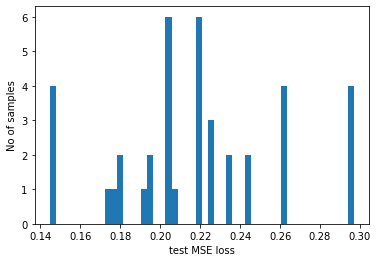

불량 개수:  39


In [24]:
# 불량 데이터 중 불량 판단

# 예측값
cn7_predict_N = dropout_AE.predict(cn7_test_N)

#불량 데이터의 복원 오차
cn7_test_N_mse = np.mean(np.square(cn7_predict_N - cn7_test_N), axis=1)

#시각화
plt.hist(cn7_test_N_mse, bins=50)
plt.xlabel('test MSE loss')
plt.ylabel('No of samples')
plt.show()

#불량으로 판단한 데이터 개수
cv7_test_N_anomalies = cn7_test_N_mse > threshold
print('불량 개수: ', np.sum(cv7_test_N_anomalies))

In [25]:
#평가 데이터의 실제 값 합침
cn7_true = np.concatenate([np.zeros(len(cv7_test_Y_anomalies)), np.ones(len(cv7_test_N_anomalies))])

#평가 데이터의 예측 값 합침
cn7_prediction = np.concatenate([cv7_test_Y_anomalies, cv7_test_N_anomalies])

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(cn7_true, cn7_prediction)

array([[2675,   22],
       [   0,   39]], dtype=int64)

In [27]:
#모델 성능 판단(accuracy, precision, recall, f1 score)
#클래스 불균형이 심하고, 불량품 탐지가 중요하므로 recall이 중요

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(cn7_true, cn7_prediction))
print("정밀도:", precision_score(cn7_true, cn7_prediction))
print("재현율:", recall_score(cn7_true, cn7_prediction))
print("F1:", f1_score(cn7_true, cn7_prediction))

정확도: 0.9919590643274854
정밀도: 0.639344262295082
재현율: 1.0
F1: 0.78


In [28]:
#정확도는 높은 반면 다른 평가 지표 결과가 낮은 이유 : 불량 데이터 수의 부족
#불량의 총 개수에 민감하므로 불량 데이터 수를 늘려 덜 민감한 성능 지표 생성 필요
#정밀도와 재현율은 trade-off 관계 : 적절한 임계값 설정 필요(현재 5시그마)